In [392]:

# ··· ··· ··· Importo librerías ··· ··· ··· #

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro

# ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· #


# ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· #

### 1.-                                                                                                         Lee un fichero xxx.csv o crea uno que contenga al menos 30 filas por 10 columnas, de las cuales una columna tipo object debe tener dos opciones y otras dos columnas tipo object debe contener tres o más opciones. Al menos dos columnas debe contener nulos. 
###

In [393]:
# 1.- Lee un fichero xxx.csv o crea uno que contenga al menos 30 filas por 10
# columnas, de las cuales una columna tipo object debe tener dos opciones y otras
# dos columnas tipo object debe contener tres o más opciones. Al menos dos
# columnas debe contener nulos.

fich1= 'EXAMEN_Alfredo.csv'
df = pd.read_csv(fich1)
df

,ID,EQUIPO,PAIS,PARTIDOS_JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES_A_FAVOR,GOLES_EN_CONTRA,PUNTOS,GANADOR
0,1,Manchester City,INGLATERRA,38.0,29.0,6.0,3,99.0,26,93,si
1,2,Liverpool,INGLATERRA,38.0,28.0,8.0,2,94.0,26,92,no
2,3,Bayern Munich,ALEMANIA,NaN,24.0,5.0,5,97.0,37,77,si
3,4,Paris S-G,FRANCIA,38.0,26.0,8.0,4,90.0,36,86,si
4,5,Real Madrid,ESPAÑA,38.0,26.0,8.0,4,80.0,31,86,si
5,6,Milan,ITALIA,38.0,26.0,8.0,4,69.0,31,86,no
6,7,Inter,ITALIA,38.0,25.0,9.0,4,84.0,32,84,no
7,8,Napoli,ITALIA,38.0,24.0,7.0,7,74.0,31,79,no
8,9,Dortmund,ALEMANIA,NaN,22.0,3.0,9,85.0,52,69,NaN
9,10,Chelsea,INGLATERRA,38.0,21.0,11.0,6,76.0,33,74,no


In [394]:
df.columns

Index(['ID', 'EQUIPO', 'PAIS', 'PARTIDOS_JUGADOS', 'GANADOS', 'EMPATES',
       'PERDIDOS', 'GOLES_A_FAVOR', 'GOLES_EN_CONTRA', 'PUNTOS', 'GANADOR'],
      dtype='object')

In [395]:
print('Número de celdas: ',df.shape[0]*df.shape[1])

Número de celdas:  385


# ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· #

###                                                                                                                2.- Transforma las columnas object a categóricas y posteriormente a numéricas. Una columna categórica de dos opciones a columnas dummy y elimina dicha columna categórica. Una columna categórica de mas de dos opciones mediante cat codes. La otra columna categórica de mas de dos opciones mediante LabelEncoder. 
###

In [396]:
# 2.- Transforma las columnas object a categóricas y posteriormente a numéricas.
# Una columna categórica de dos opciones a columnas dummy y elimina dicha
# columna categórica. Una columna categórica de mas de dos opciones mediante
# cat codes. La otra columna categórica de mas de dos opciones mediante
# LabelEncoder.

df.dtypes

ID                    int64
EQUIPO               object
PAIS                 object
PARTIDOS_JUGADOS    float64
GANADOS             float64
EMPATES             float64
PERDIDOS              int64
GOLES_A_FAVOR       float64
GOLES_EN_CONTRA       int64
PUNTOS                int64
GANADOR              object
dtype: object

In [397]:
df.isnull().sum()

ID                  0
EQUIPO              0
PAIS                0
PARTIDOS_JUGADOS    6
GANADOS             1
EMPATES             2
PERDIDOS            0
GOLES_A_FAVOR       2
GOLES_EN_CONTRA     0
PUNTOS              0
GANADOR             5
dtype: int64

In [398]:
le = LabelEncoder()

In [399]:
df.EQUIPO = le.fit_transform(df.EQUIPO.values)

In [400]:
df.PAIS = le.fit_transform(df.PAIS.values)

In [401]:
df.PARTIDOS_JUGADOS = le.fit_transform(df.PARTIDOS_JUGADOS.values)

In [402]:
df.GANADOS = le.fit_transform(df.GANADOS.values)

In [403]:
df.EMPATES = le.fit_transform(df.EMPATES.values)

In [404]:
df.PERDIDOS = le.fit_transform(df.PERDIDOS.values)

In [405]:
df.GOLES_A_FAVOR = le.fit_transform(df.GOLES_A_FAVOR.values)

In [406]:
df.GOLES_EN_CONTRA = le.fit_transform(df.GOLES_EN_CONTRA.values)

In [407]:
df.GANADOR = le.fit_transform(df.GANADOR.values)

In [408]:
df.dtypes

ID                  int64
EQUIPO              int64
PAIS                int64
PARTIDOS_JUGADOS    int64
GANADOS             int64
EMPATES             int64
PERDIDOS            int64
GOLES_A_FAVOR       int64
GOLES_EN_CONTRA     int64
PUNTOS              int64
GANADOR             int64
dtype: object

In [409]:
df

,ID,EQUIPO,PAIS,PARTIDOS_JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES_A_FAVOR,GOLES_EN_CONTRA,PUNTOS,GANADOR
0,1,17,3,0,12,2,1,24,0,93,1
1,2,15,3,0,11,4,0,22,0,92,0
2,3,4,0,1,8,1,3,23,6,77,1
3,4,24,2,0,10,4,2,21,5,86,1
4,5,26,1,0,10,4,2,17,2,86,1
5,6,20,4,0,10,4,2,12,2,86,0
6,7,10,4,0,9,5,2,19,3,84,0
7,8,22,4,0,8,3,5,14,2,79,0
8,9,7,0,1,7,0,7,20,15,69,2
9,10,6,3,0,6,7,4,15,4,74,0


# ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· #

### 3.- Rellena los nulos
###

In [410]:
df.isnull().sum()

ID                  0
EQUIPO              0
PAIS                0
PARTIDOS_JUGADOS    0
GANADOS             0
EMPATES             0
PERDIDOS            0
GOLES_A_FAVOR       0
GOLES_EN_CONTRA     0
PUNTOS              0
GANADOR             0
dtype: int64

# ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· #

### 4.- Dibuja el histograma de cada columna 
###

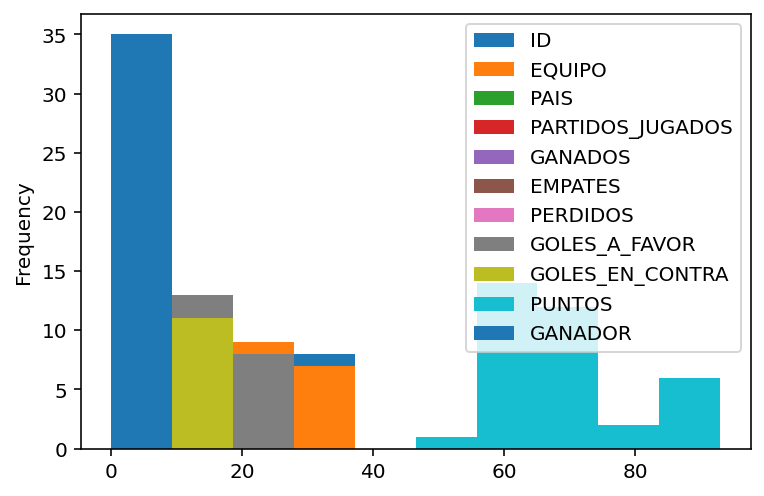

In [411]:
histogram = df.plot.hist()

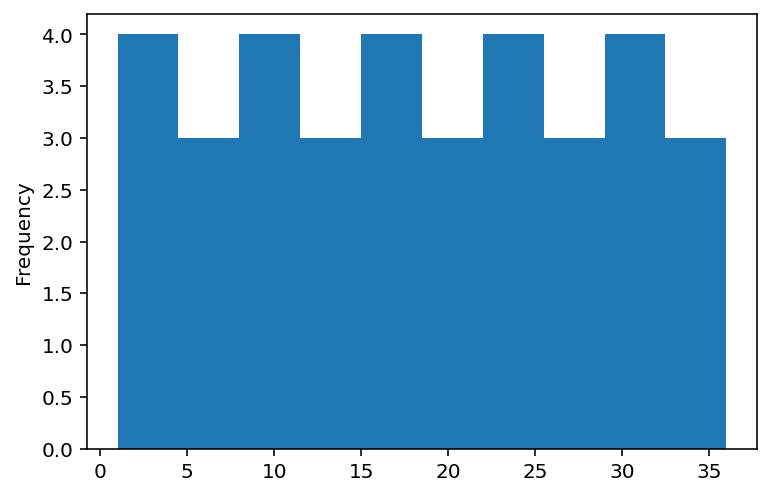

In [412]:
histogram = df.ID.plot.hist()

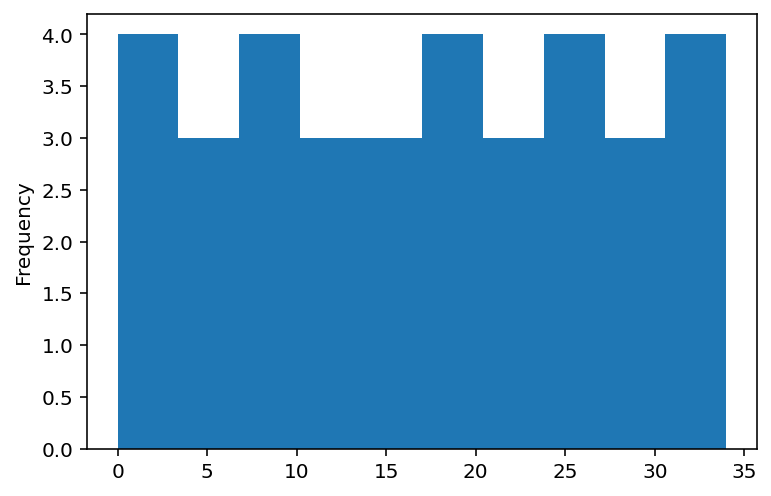

In [413]:
histogram = df.EQUIPO.plot.hist()

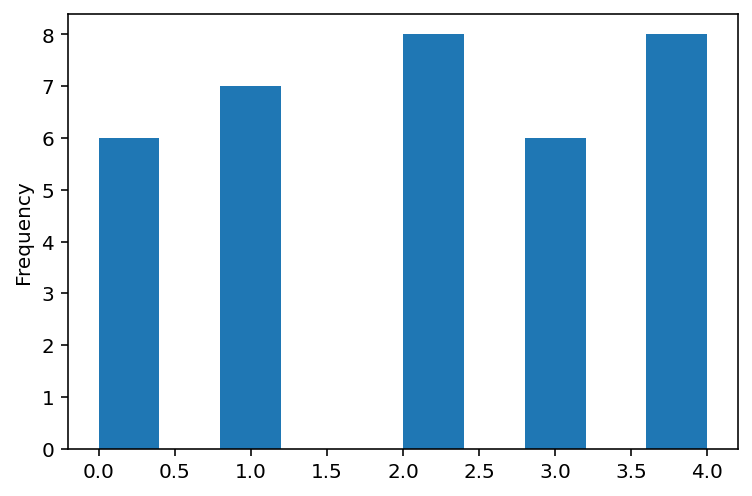

In [414]:
histogram = df.PAIS.plot.hist()

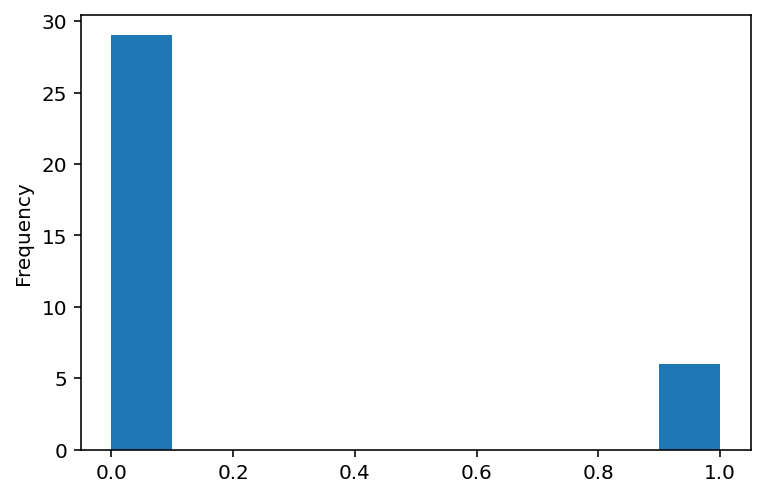

In [415]:
histogram = df.PARTIDOS_JUGADOS.plot.hist()

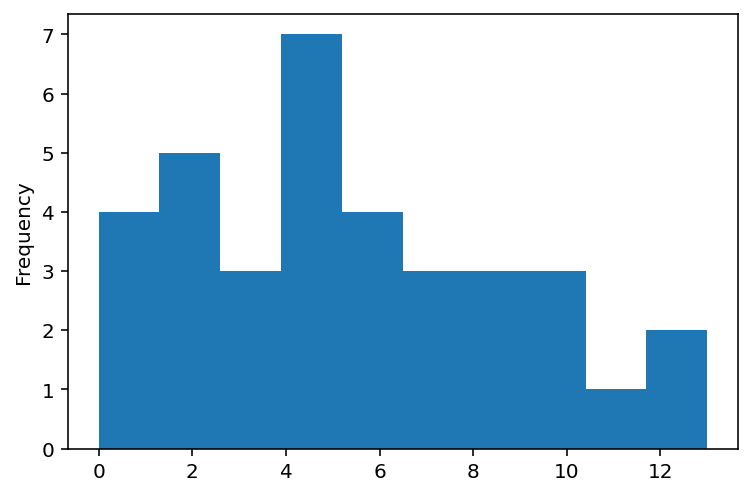

In [416]:
histogram = df.GANADOS.plot.hist()

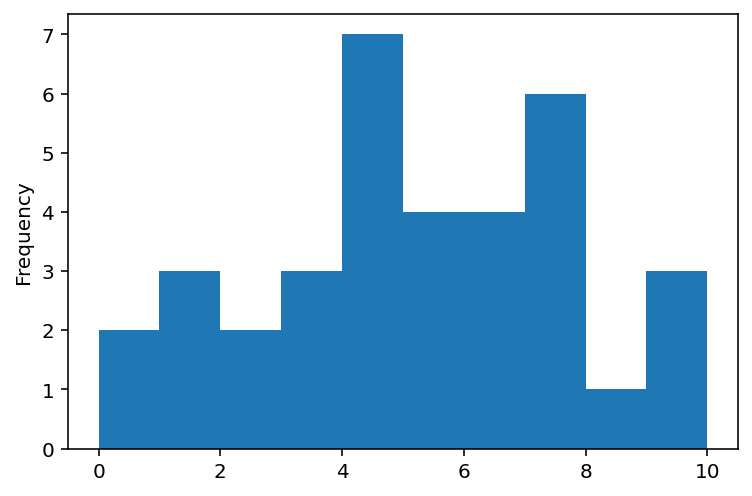

In [417]:
histogram = df.EMPATES.plot.hist()

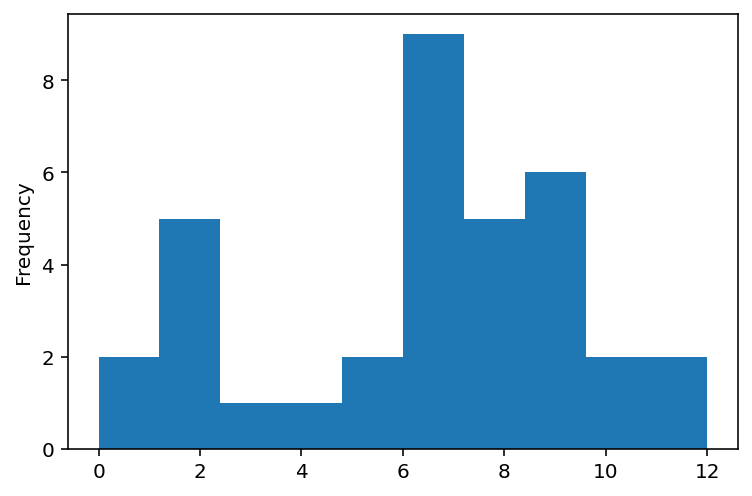

In [418]:
histogram = df.PERDIDOS.plot.hist()

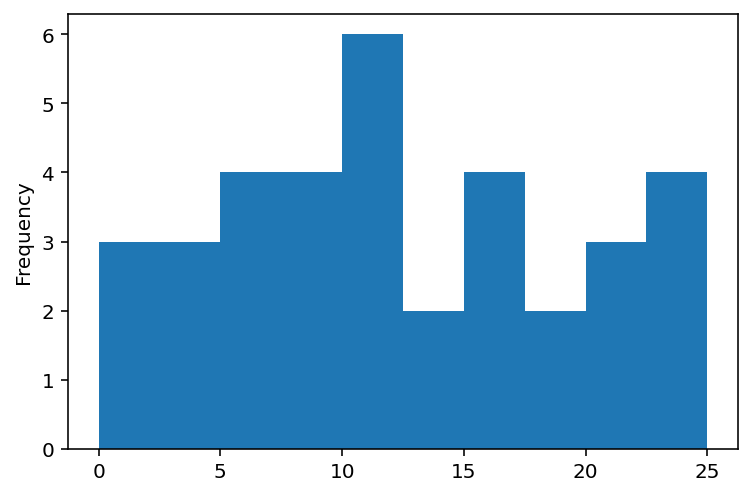

In [419]:
histogram = df.GOLES_A_FAVOR.plot.hist()

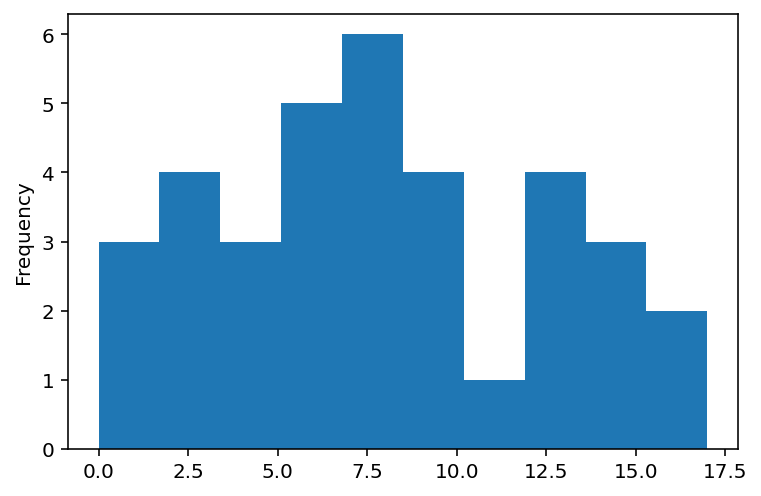

In [420]:
histogram = df.GOLES_EN_CONTRA.plot.hist()

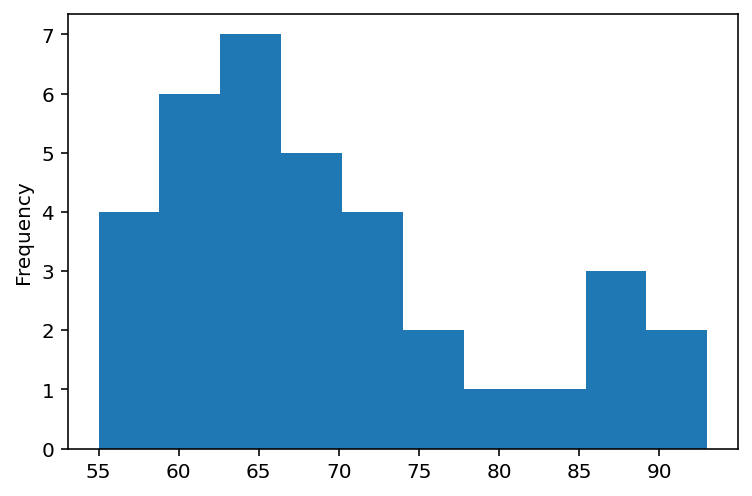

In [421]:
histogram = df.PUNTOS.plot.hist()

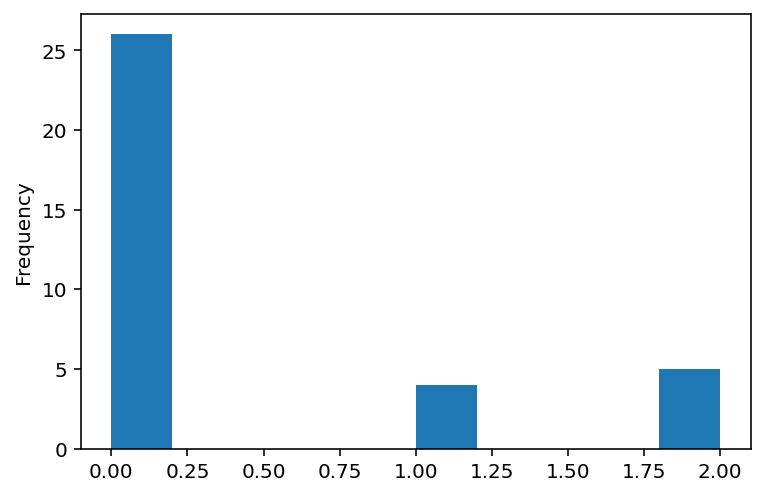

In [422]:
histogram = df.GANADOR.plot.hist()

In [423]:
df.columns


Index(['ID', 'EQUIPO', 'PAIS', 'PARTIDOS_JUGADOS', 'GANADOS', 'EMPATES',
       'PERDIDOS', 'GOLES_A_FAVOR', 'GOLES_EN_CONTRA', 'PUNTOS', 'GANADOR'],
      dtype='object')

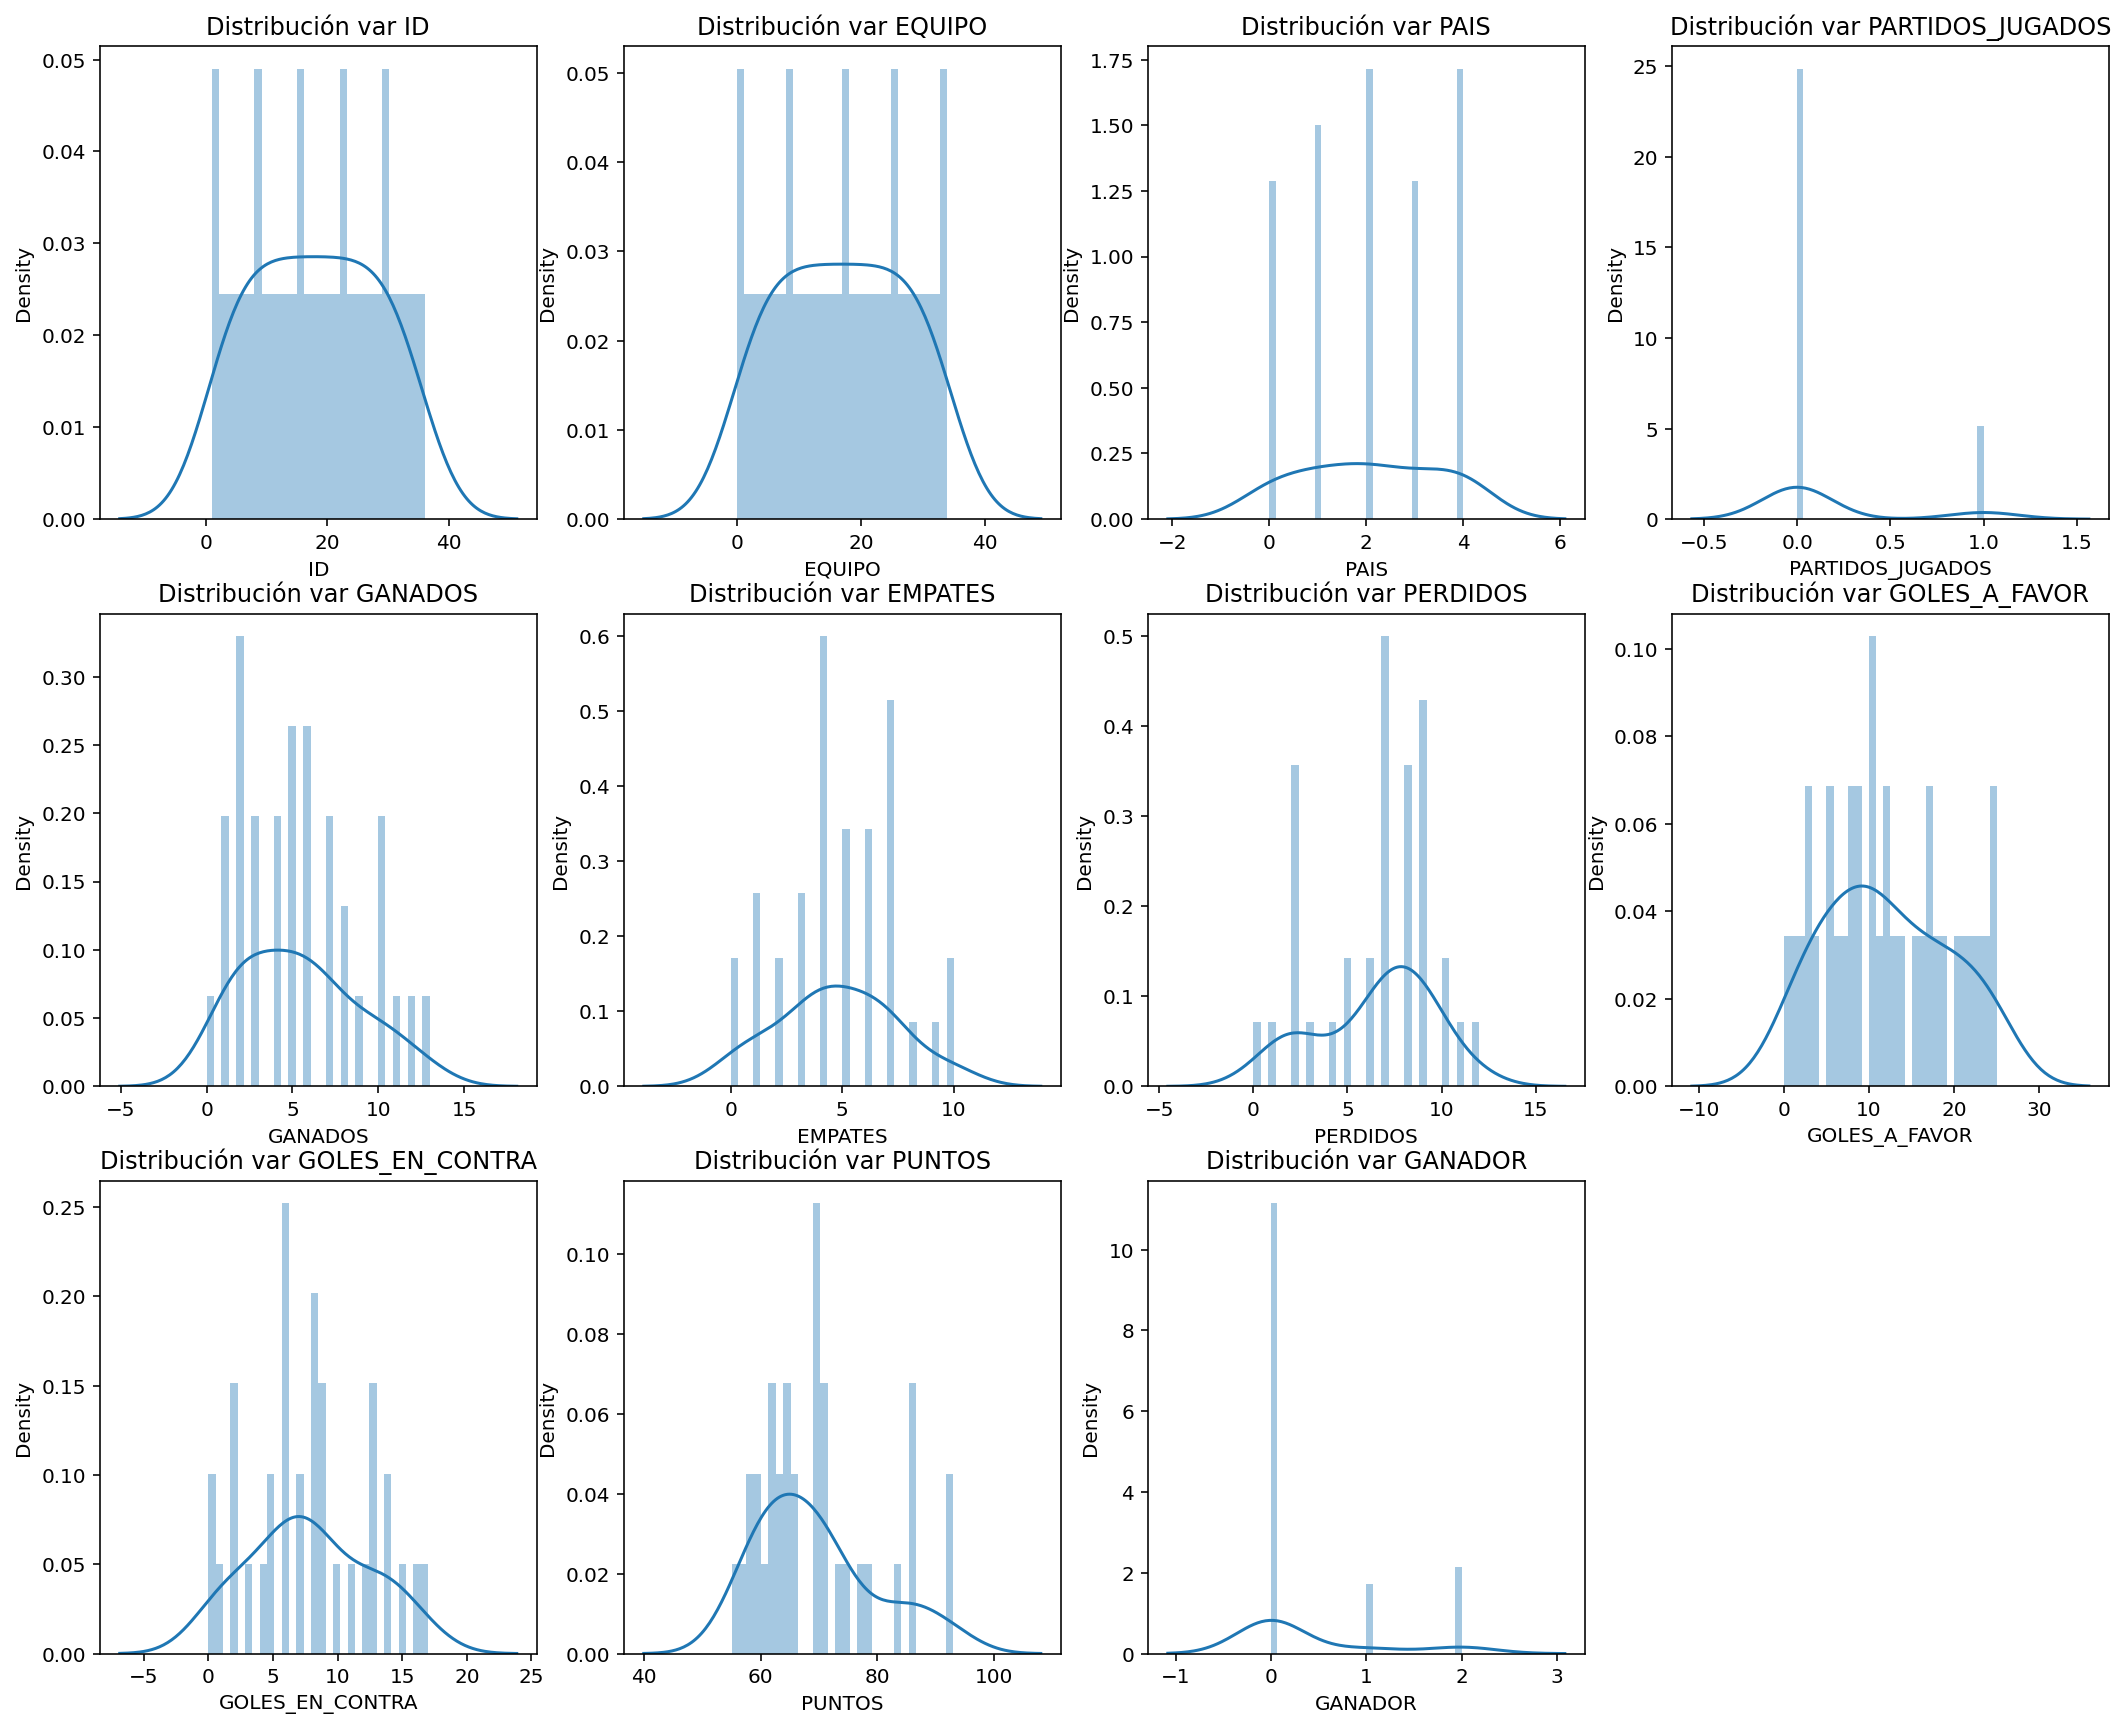

In [424]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(df.columns):
    n+=1
    plt.subplot(4, 4, n)
    try:
        sns.distplot(df[column], bins=30)
    except:
        pass
    plt.title('Distribución var {}'.format(column))
plt.show()

# ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· #

### 5.- Aplica el test de Shapiro
###

In [502]:
shapiro(df)

ShapiroResult(statistic=0.9090792536735535, pvalue=1.2298131650823052e-06)

In [506]:
shapiro(df['PARTIDOS_JUGADOS'])

ShapiroResult(statistic=1.0, pvalue=1.0)

In [508]:
shapiro(df['GANADOS'])

ShapiroResult(statistic=0.9152485728263855, pvalue=0.026508912444114685)

In [509]:
shapiro(df['EMPATES'])

ShapiroResult(statistic=0.9569274187088013, pvalue=0.294159471988678)

In [510]:
shapiro(df['GOLES_A_FAVOR'])

ShapiroResult(statistic=0.9541735053062439, pvalue=0.2517890930175781)

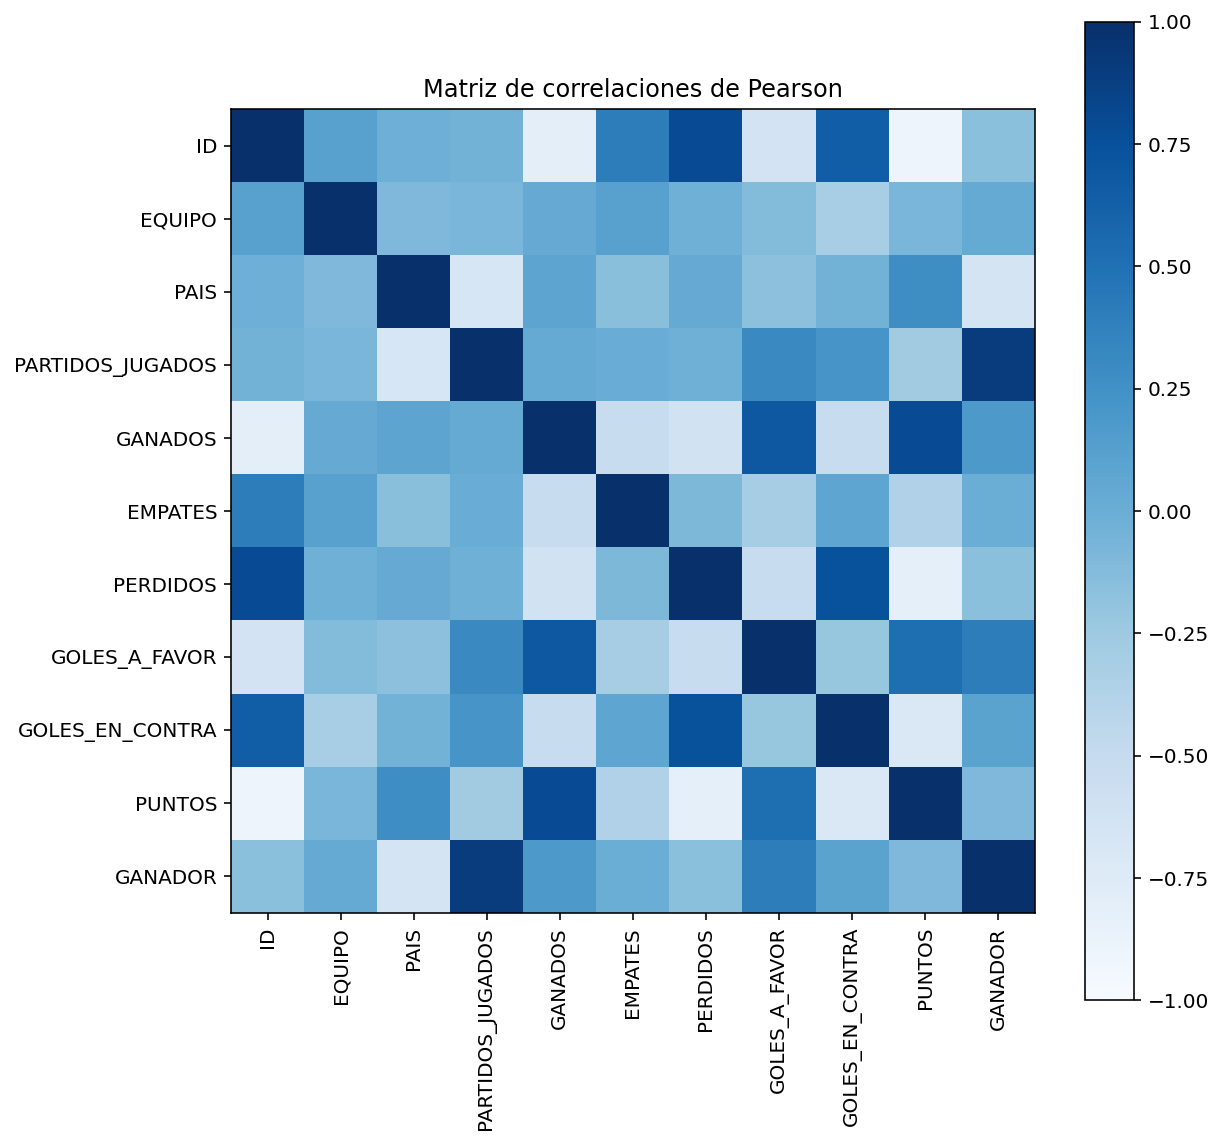

In [425]:
# 3.- Dibuja el grafico de la matriz de correlación

matriz_correlaciones = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

In [426]:
# 4.- Normaliza los datos numéricos y divídelos en train
# y test

X = df.drop('GANADOR', axis=1)
Y = df['GANADOR']

In [427]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
PARTIDOS_JUGADOS,0.899185
PAIS,-0.652327
GOLES_A_FAVOR,0.400489
GANADOS,0.186368
PERDIDOS,-0.160925
ID,-0.160746
PUNTOS,-0.100099
GOLES_EN_CONTRA,0.094378
EQUIPO,0.035116
EMPATES,0.003034


In [428]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [429]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

In [430]:
# 5.- Aplica el modelo de Regresión Logistica,
# umbraliza los datos y matriz de confusión (2 punto)
modelo = LogisticRegression()
parametros = {"C": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

In [431]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros,cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [432]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.01, 'class_weight': 'balanced'} 
ROC AUC: nan


In [433]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

In [434]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [435]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [436]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

In [437]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [438]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [439]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))

Matriz de confusión
 [[7]]

Accuracy	1.0
Sensitividad	0.0
Precisión	0.0


# ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· #

### 6.- Dibula el gráfico de la matriz de correlación 


### 7.- Normaliza los datos numéricos y divídelos en train y test
###

In [440]:
# 6.- Aplica el modelo de Arboles de Decisión,
# umbraliza los datos y matriz de confusión

regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=4)


In [441]:
y_test_pred = regr_opt.predict(X_test)
y_test_pred.shape

(7,)

In [442]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred[:] > umbral)

In [443]:
Y_test.shape

(7,)

In [444]:
Y_test

29    0
20    0
16    0
28    0
22    0
15    0
10    0
Name: GANADOR, dtype: int64

In [445]:
y_umbralizadas.shape

(7,)

In [446]:
y_umbralizadas

array([0, 0, 0, 0, 0, 0, 0])

In [447]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[7]]


# ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· #

### 7.- Normaliza los datos numéricos y divídelos en train y test

In [448]:
# 7.- Aplica el modelo de KNN Vecinos , umbraliza los
# datos y matriz de confusión

y_ruido = np.sin(X_train)[:, 0] + np.random.normal(size=X_train.shape[0],scale=0.20)

In [449]:
x_train2=X_train[:,0]

In [450]:
clf = KNeighborsRegressor()
params = {"n_neighbors": range(1, 20)}

In [451]:
clf_gs = GridSearchCV(clf, params, cv=3)
clf_gs.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(clf_gs.best_estimator_))

El mejor estimador es: KNeighborsRegressor(n_neighbors=6)


In [452]:
y_test_predict=clf_gs.predict(X_test)

In [453]:
umbral = 0.6
y_umbralizadas = 1*(y_test_predict[:] > umbral)

In [454]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[7]]


In [457]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [458]:
import pandas as pd

df = pd.read_csv('EXAMEN_Alfredo.csv', sep = ',')
df.head()

,ID,EQUIPO,PAIS,PARTIDOS_JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES_A_FAVOR,GOLES_EN_CONTRA,PUNTOS,GANADOR
0,1,Manchester City,INGLATERRA,38.0,29.0,6.0,3,99.0,26,93,si
1,2,Liverpool,INGLATERRA,38.0,28.0,8.0,2,94.0,26,92,no
2,3,Bayern Munich,ALEMANIA,NaN,24.0,5.0,5,97.0,37,77,si
3,4,Paris S-G,FRANCIA,38.0,26.0,8.0,4,90.0,36,86,si
4,5,Real Madrid,ESPAÑA,38.0,26.0,8.0,4,80.0,31,86,si


In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


df.head()

col_names = list(df.columns)
col_names.remove('GANADORES')

Granja = df[col_names]

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(Granja, 'fich1')



Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


NameError: name 'df' is not defined

In [460]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(X)
kmeans.cluster_centers_

array([[ 6.        , 14.        ,  2.27272727,  0.18181818,  8.81818182,
         3.63636364,  3.        , 19.27272727,  4.18181818, 81.72727273],
       [25.        ,  9.08333333,  2.33333333,  0.16666667,  3.25      ,
         5.66666667,  8.41666667,  8.5       , 12.16666667, 63.33333333],
       [22.08333333, 27.66666667,  1.66666667,  0.16666667,  4.5       ,
         4.91666667,  7.66666667,  9.16666667,  6.91666667, 64.58333333]])

In [461]:
clust = kmeans.predict(X)

for i in range(max(clust) + 1):
    print ("Cluster", i)
    print (df['EQUIPO'][clust == i])

Cluster 0
0     Manchester City
1           Liverpool
2       Bayern Munich
3           Paris S-G
4         Real Madrid
5               Milan
6               Inter
7              Napoli
8            Dortmund
9             Chelsea
10          Barcelona
Name: EQUIPO, dtype: object
Cluster 1
11            Leverkusen
14    Atletico de Madrid
16              Juventus
18               Arsenal
22                 Betis
23                 Lazio
27                  Lens
28            Fiorentina
30              Freiburg
31                  Lyon
33              Atalanta
34        Manchester Utd
Name: EQUIPO, dtype: object
Cluster 2
12        Tottenham
13        Marseille
15          Sevilla
17           Monaco
19           Rennes
20             Nice
21       RB Leipzig
24     Union Berlin
25       Strasbourg
26             Roma
29    Real Sociedad
32       Villarreal
Name: EQUIPO, dtype: object


In [511]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


df.head()

col_names = list(df.columns)
col_names.remove()

Granja = df[col_names]

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(df, 'df')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


ValueError: list.remove(x): x not in list